# Early Stage Diabetes Risk  Prediction model

Diabetes poses a substantial worldwide health concern, affecting individuals, families, 
and healthcare systems on a profound scale. To successfully address and alleviate the repercussions
of diabetes on both individuals and society at large, persistent endeavors in research, education, 
and public health initiatives are indispensable.This motivates me to start working on this project.







### Mission and Vision

This project aims to thoroughly examine and build a machine learning model focused on predicting the probability of
a patient developing diabetes at early stages based on specific health records.

### About the dataset

This dataset comprises crucial sign and symptom data of individuals who either exhibit early signs of diabetes
or are at risk of developing diabetes. The variables included in the dataset provide valuable insights into potential
indicators of diabetes onset. The dataset encompasses diverse information, ranging from demographic details to specific
symptoms associated with diabetes.
This is a synthetic data from kaggle.com and i will use this for my project.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score, roc_auc_score, f1_score, precision_score

In [2]:
# Import dataset
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')
print('shape of dataset', df.shape)
df.head()

shape of dataset (520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
# checking for missing values
print(df.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


##### All Variables look great with no missing data

# Exploratory Data Analysis [EDA]

In [5]:
# Performing value counts for all the features
cols=['Gender', 'Polyuria','Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
     'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
     'Alopecia', 'Obesity', 'class']
for col in cols:
    print(df[col].value_counts())
    print('-'*35)

Male      328
Female    192
Name: Gender, dtype: int64
-----------------------------------
No     262
Yes    258
Name: Polyuria, dtype: int64
-----------------------------------
No     287
Yes    233
Name: Polydipsia, dtype: int64
-----------------------------------
No     303
Yes    217
Name: sudden weight loss, dtype: int64
-----------------------------------
Yes    305
No     215
Name: weakness, dtype: int64
-----------------------------------
No     283
Yes    237
Name: Polyphagia, dtype: int64
-----------------------------------
No     404
Yes    116
Name: Genital thrush, dtype: int64
-----------------------------------
No     287
Yes    233
Name: visual blurring, dtype: int64
-----------------------------------
No     267
Yes    253
Name: Itching, dtype: int64
-----------------------------------
No     394
Yes    126
Name: Irritability, dtype: int64
-----------------------------------
No     281
Yes    239
Name: delayed healing, dtype: int64
-----------------------------------
No

#### I randomly selected some variables and performed analysis on them. these variables includes;
Age, Gender, class, obesity, Polyuria, Polydipsia, weakness, polyphagia, Alopecia, Partial paresis and 
sudden weight loss

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
     we don't normally use gender for analysis and modelling due to data ethics but since this is health issue and a matter of concern for all, we'd use it
    </div>


### GENDER

Male      328
Female    192
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender')

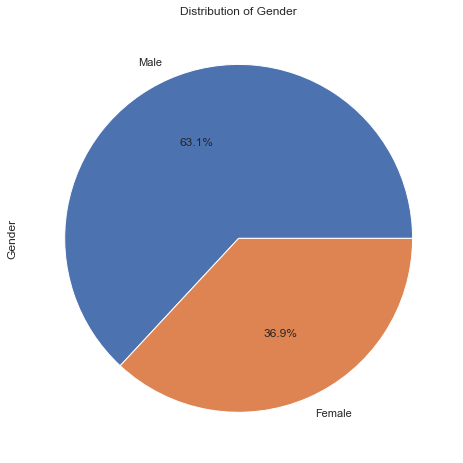

In [6]:
# GENDER
sns.set(rc={'figure.figsize':(10,8)})
g = df.Gender.value_counts()
print(g)
# Visualizing the gender
g.plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of Gender')

### AGE

minimum Age; 16
maximum Age; 90
mean Age; 48.02884615384615
median Age; 47.5


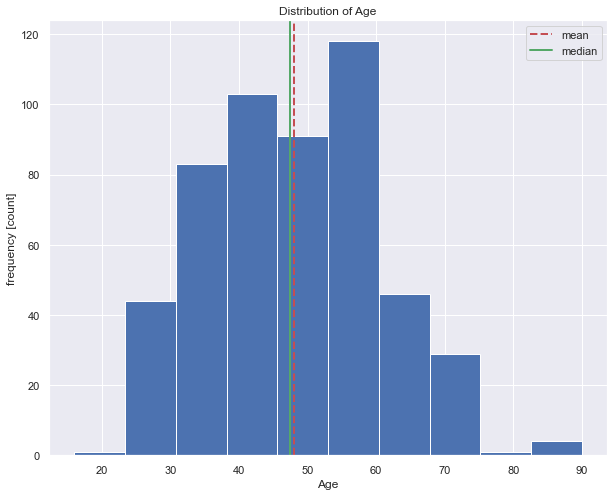

In [7]:
# AGE
min = df.Age.min()
max = df.Age.max()
mean = df.Age.mean()
median = df.Age.median()
print('minimum Age;', min)
print('maximum Age;', max)
print('mean Age;', mean)
print('median Age;', median)
# ploting
df.Age.hist()
plt.axvline(mean,color='r',linewidth=2,linestyle='--',label='mean')
plt.axvline(median,color='g',linewidth=2,linestyle='-',label='median')
plt.xlabel('Age')
plt.ylabel('frequency [count]')
plt.title('Distribution of Age')
plt.legend();

### Polyuria analysis

Text(0.5, 1.0, 'Distribution of Polyuria')

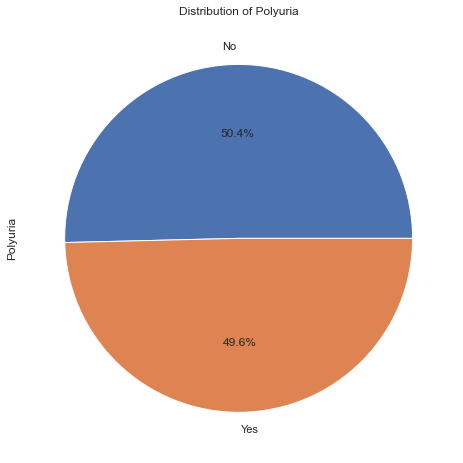

In [8]:
# POLYURIA
sns.set(rc={'figure.figsize':(10,8)})
# Visualizing the Polyuria
df['Polyuria'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of Polyuria')

In [9]:
# Gender Distribution of Patients with polyuria
df[df['Polyuria']=='Yes'].Gender.value_counts().to_frame()

,Gender
Male,129
Female,129


Equal number of males and females had polyuria

In [10]:
prop_female_Polyuria=(129/192)*100
prop_male_Polyuria=(129/328)*100
print('percentage of male with Polyuria:',prop_male_Polyuria)
print('percentage of female with Polyuria:',prop_female_Polyuria)

percentage of male with Polyuria: 39.329268292682926
percentage of female with Polyuria: 67.1875


Text(0.5, 1.0, 'Age Distribution of patients with Polyuria')

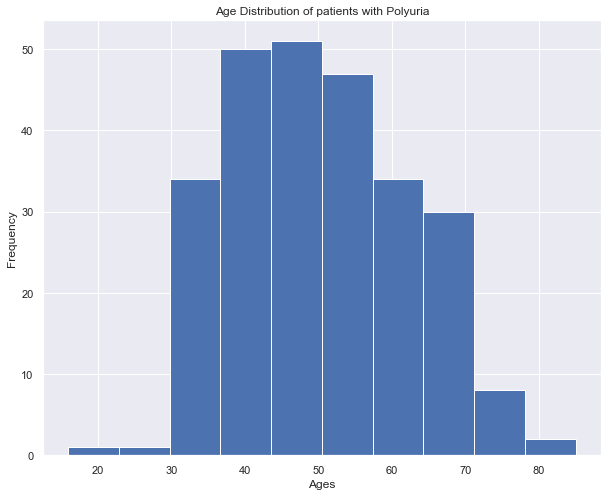

In [11]:
# Age Distribution of patients with Polyuria
df[df['Polyuria']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Polyuria")

Patients within the age range of [40 and 50]  had the highest Polyuria counts

### Polydipsia Analysis

Text(0.5, 1.0, 'Distribution of Polydipsia')

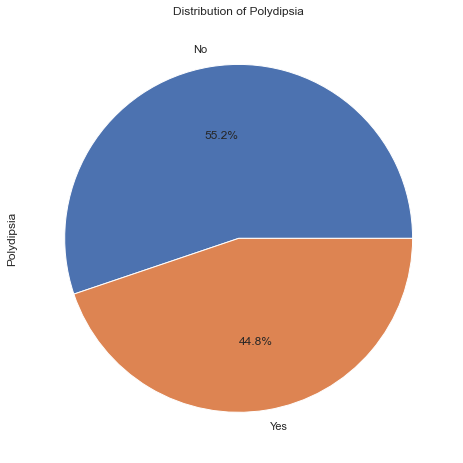

In [12]:
# POLYDIPSIA
# Visualizing the Polydipsia
df['Polydipsia'].value_counts().plot.pie(autopct = '%1.1f%%')

plt.title('Distribution of Polydipsia')


In [13]:
# Gender Distribution of Patients with polydipsia
df[df['Polydipsia']=='Yes'].Gender.value_counts().to_frame()

,Gender
Female,125
Male,108


More Female patients had Polydipsia than male patients

In [14]:
prop_female_Polydipsia=(125/192)*100
prop_male_Polydipsia=(108/328)*100
print('percentage of male with Polydipsia:',prop_male_Polydipsia)
print('percentage of female with Polydipsia:',prop_female_Polydipsia)

percentage of male with Polydipsia: 32.926829268292686
percentage of female with Polydipsia: 65.10416666666666


Text(0.5, 1.0, 'Age Distribution of patients with Polydipsia')

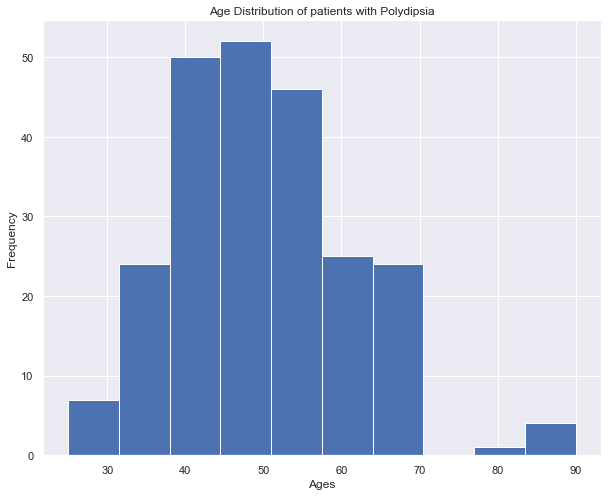

In [15]:
# Age Distribution of patients with Polydipsia
df[df['Polydipsia']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Polydipsia")

Patients within the age range of [40 and 60] had the highest Polydipsia counts

### Sudden Weight Loss Analysis

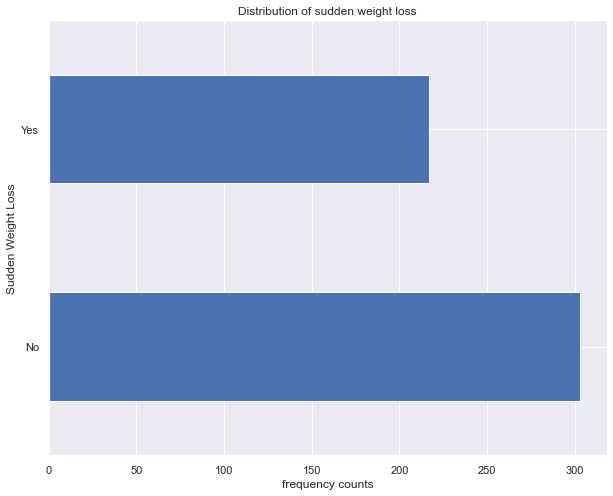

In [16]:
# SUDDEN WEIGHT LOSS
# Visualizing the sudden weight loss
df['sudden weight loss'].value_counts().plot(kind="barh")
plt.ylabel("Sudden Weight Loss")
plt.xlabel('frequency counts')
plt.title('Distribution of sudden weight loss')
plt.xticks(rotation=0);

In [17]:
# Gender Distribution of Patients with sudden weight loss
df[df['sudden weight loss']=='Yes'].Gender.value_counts().to_frame()

,Gender
Female,115
Male,102


More female patients had sudden weight loss than male patients

In [18]:
prop_female_sudden_weight_loss=(115/192)*100
prop_male_sudden_weight_loss=(102/328)*100
print('percentage of male with sudden weight loss:',prop_male_sudden_weight_loss)
print('percentage of female with sudden weight loss :',prop_female_sudden_weight_loss)

percentage of male with sudden weight loss: 31.097560975609756
percentage of female with sudden weight loss : 59.895833333333336


Text(0.5, 1.0, 'Age Distribution of patients with Sudden weight Loss')

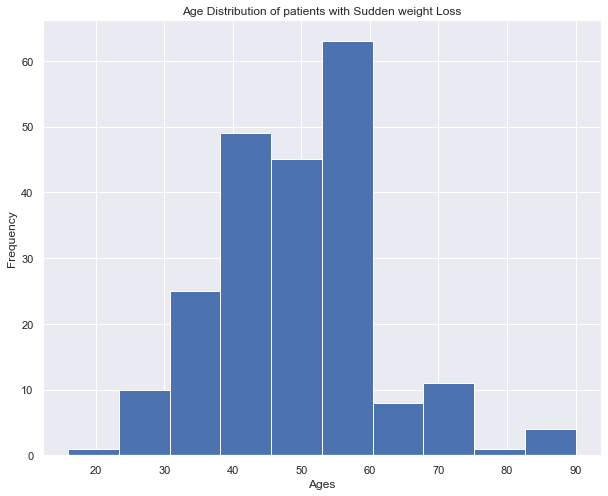

In [19]:
# Age Distribution of patients with sudden weight loss
df[df['sudden weight loss']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Sudden weight Loss")

Patients within the age range of [50 and 60] had the highest sudden weight loss counts

### Weekness Analysis

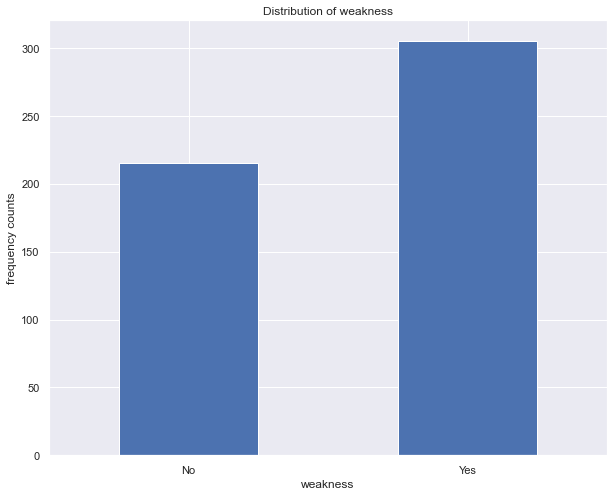

In [20]:
# WEEKNESS
# Visualizing the weakness
df['weakness'].value_counts().sort_values().plot.bar()
plt.xlabel('weakness')
plt.ylabel('frequency counts')
plt.title('Distribution of weakness')
plt.xticks(rotation=0);

In [21]:
# Gender Distribution of Patients with weakness
df[df['weakness']=='Yes'].Gender.value_counts().to_frame()

,Gender
Male,177
Female,128


More Male patients are weeker than females

In [22]:
prop_female_weakness=(128/192)*100
prop_male_weakness=(177/328)*100
print('percentage of male with weakness:',prop_male_weakness)
print('percentage of female with weakness :',prop_female_weakness)

percentage of male with weakness: 53.963414634146346
percentage of female with weakness : 66.66666666666666


Text(0.5, 1.0, 'Age Distribution of patients with Weakness')

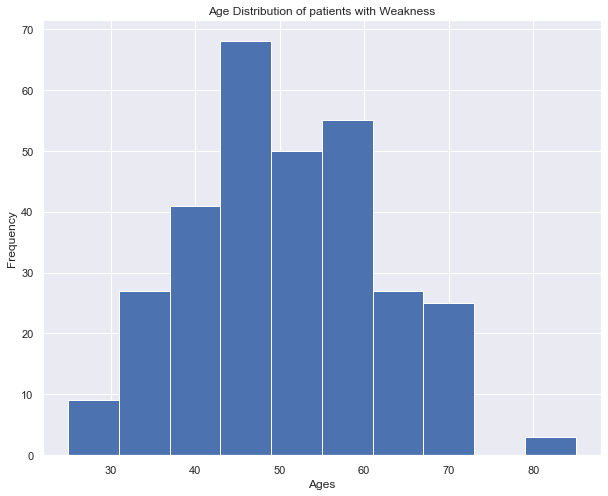

In [23]:
# Age Distribution of patients with weakness
df[df['weakness']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Weakness")

Patients within the age range of [40 and 50] had the highest weekness counts

### Polyphagia Analysis

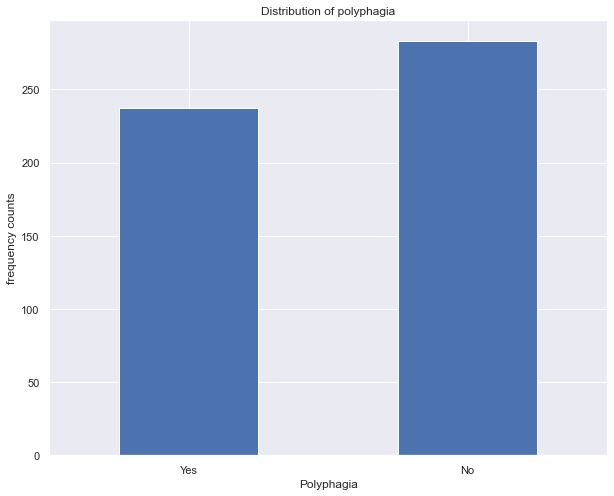

In [24]:
# POLYPHAGIA
# Visualizing the polyphagia
df['Polyphagia'].value_counts().sort_values().plot.bar()
plt.xlabel('Polyphagia')
plt.ylabel('frequency counts')
plt.title('Distribution of polyphagia')
plt.xticks(rotation=0);

In [25]:
# Gender Distribution of Patients with Polyphagia
df[df['Polyphagia']=='Yes'].Gender.value_counts().to_frame()

,Gender
Male,122
Female,115


more male patients had Polyphagia more than female patients

In [26]:
prop_female_Polyphagia=(115/192)*100
prop_male_Polyphagia=(122/328)*100
print('percentage of male with Polyphagia:',prop_male_Polyphagia)
print('percentage of female with Polyphagia :',prop_female_Polyphagia)

percentage of male with Polyphagia: 37.19512195121951
percentage of female with Polyphagia : 59.895833333333336


Text(0.5, 1.0, 'Age Distribution of patients with Polyphagia')

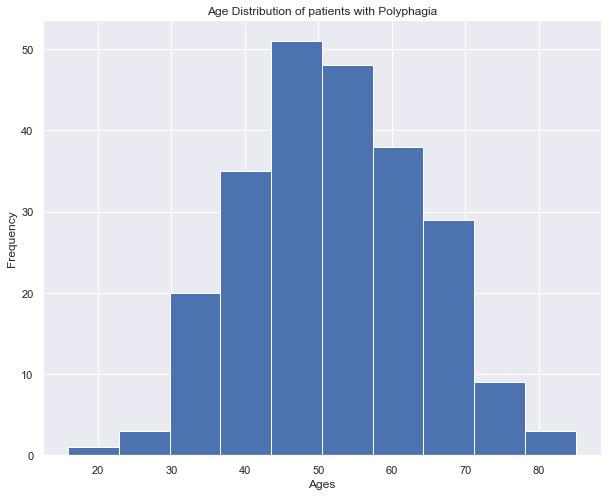

In [27]:
# Age Distribution of patients with Polyphagia
df[df['Polyphagia']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Polyphagia")

Patients within the age range of [40 and 50] had the highest Polyphagia counts

### Partial Paresis Analysis

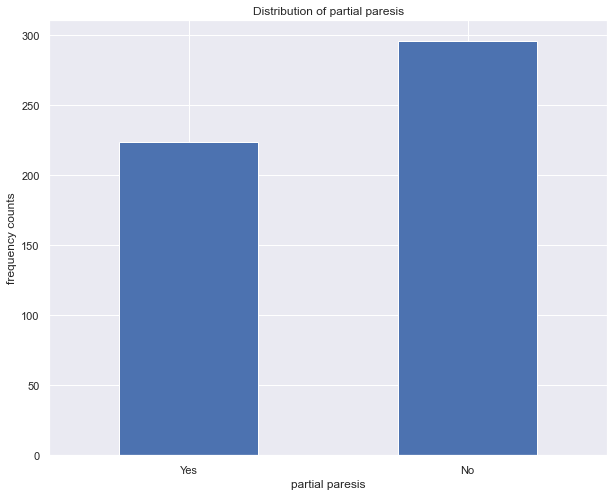

In [28]:
# PARTIAL PARESIS
# Visualizing the partial paresis
df['partial paresis'].value_counts().sort_values().plot.bar()
plt.xlabel('partial paresis')
plt.ylabel('frequency counts')
plt.title('Distribution of partial paresis')
plt.xticks(rotation=0);

In [29]:
# Gender Distribution of Patients with partial paresis
df[df['partial paresis']=='Yes'].Gender.value_counts().to_frame()

,Gender
Female,124
Male,100


more female patients suffer from partial paresis than male patients

In [30]:
prop_female_partial_paresis=(124/192)*100
prop_male_partial_paresis=(100/328)*100
print('percentage of male with partial_paresis:',prop_male_partial_paresis)
print('percentage of female with partial_paresis :',prop_female_partial_paresis)

percentage of male with partial_paresis: 30.48780487804878
percentage of female with partial_paresis : 64.58333333333334


Text(0.5, 1.0, 'Age Distribution of patients with Partial paresis')

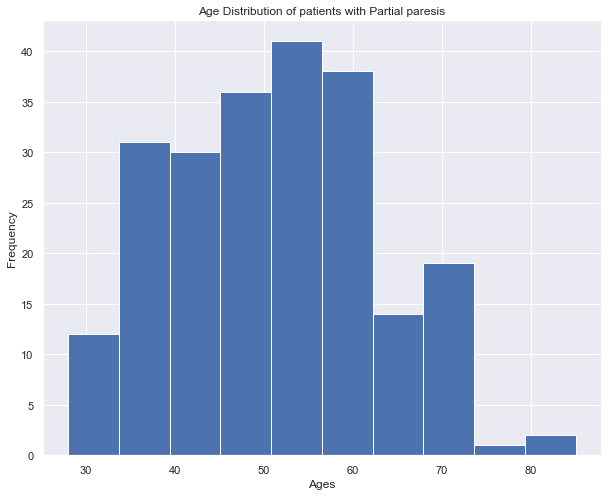

In [31]:
# Age Distribution of patients with partial_paresis
df[df['partial paresis']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Partial paresis")

Patients within the age range of [50 and 60] had the highest partial paresis counts

### Alopecia Analysis

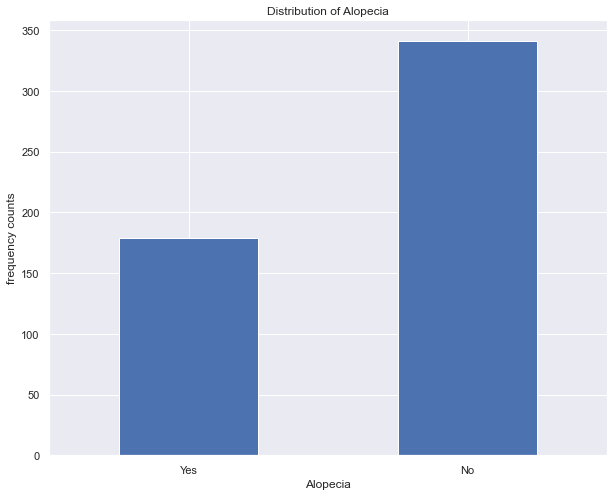

In [32]:
# ALOPECIA
# Visualizing the Alopecia
df['Alopecia'].value_counts().sort_values().plot.bar()
plt.xlabel('Alopecia')
plt.ylabel('frequency counts')
plt.title('Distribution of Alopecia')
plt.xticks(rotation=0);

In [33]:
# Gender Distribution of Patients with Alopecia
df[df['Alopecia']=='Yes'].Gender.value_counts().to_frame()

,Gender
Male,152
Female,27


more male patients suffer from Alopecia than female patients

In [34]:
prop_female_Alopecia=(27/192)*100
prop_male_Alopecia=(152/328)*100
print('percentage of male with Alopecia :',prop_male_Alopecia)
print('percentage of female with Alopecia :',prop_female_Alopecia)

percentage of male with Alopecia : 46.34146341463415
percentage of female with Alopecia : 14.0625


Text(0.5, 1.0, 'Age Distribution of patients with Alopecia')

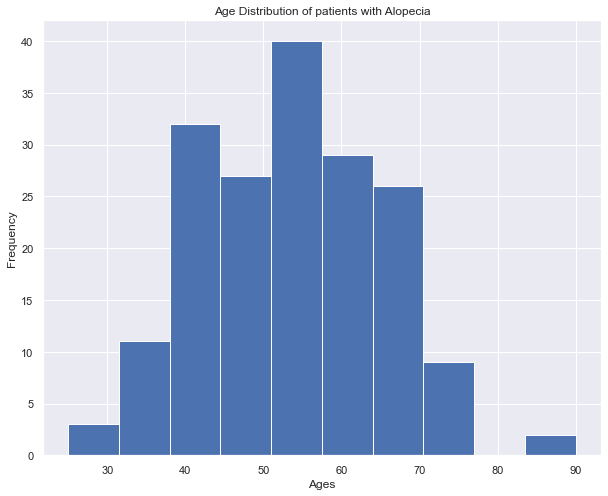

In [35]:
# Age Distribution of patients with Alopecia
df[df['Alopecia']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of patients with Alopecia")

Patients within the age range of [50 and 60] had the highest Alopecia counts

### Obesity Analysis

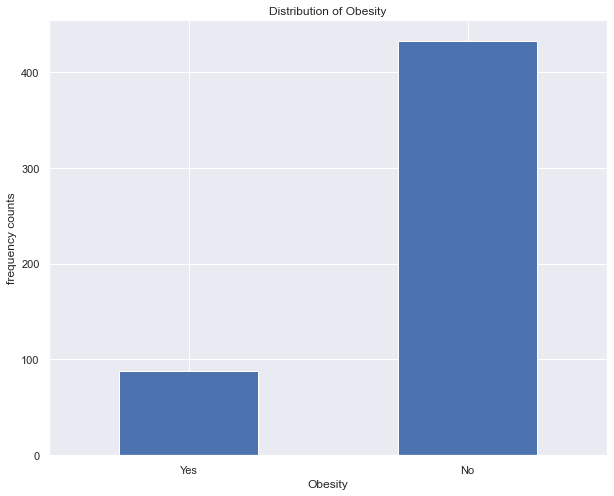

In [36]:
# OBESITY
# Visualizing the Obesity
df['Obesity'].value_counts().sort_values().plot.bar()
plt.xlabel('Obesity')
plt.ylabel('frequency counts')
plt.title('Distribution of Obesity')
plt.xticks(rotation=0);

In [37]:
# Gender Distribution of Patients with Obesity
df[df['Obesity']=='Yes'].Gender.value_counts().to_frame()

,Gender
Male,55
Female,33


more male patients are obess than female patients

In [38]:
prop_female_Obesity=(33/192)*100
prop_male_Obesity=(55/328)*100
print('percentage of male  Obese patients :',prop_male_Obesity)
print('percentage of female obese patients :',prop_female_Obesity)

percentage of male  Obese patients : 16.76829268292683
percentage of female obese patients : 17.1875


Text(0.5, 1.0, 'Age Distribution of Obese patients ')

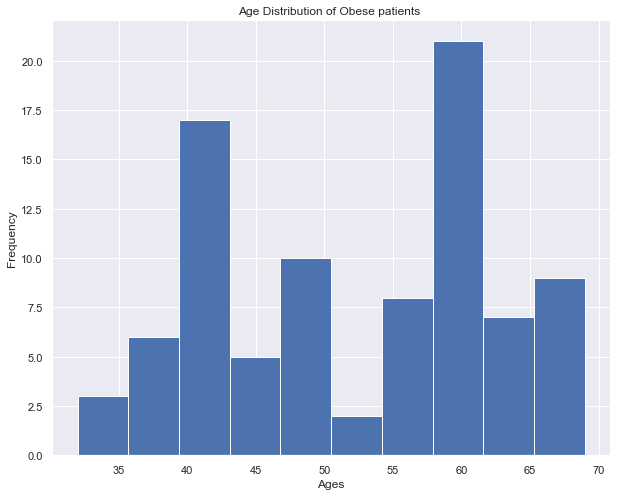

In [39]:
# Age Distribution of patients with Obesity
df[df['Obesity']=='Yes'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of Obese patients ")

Patients within the age range of [50 and 60] had the highest Obesity counts

### Class Analysis

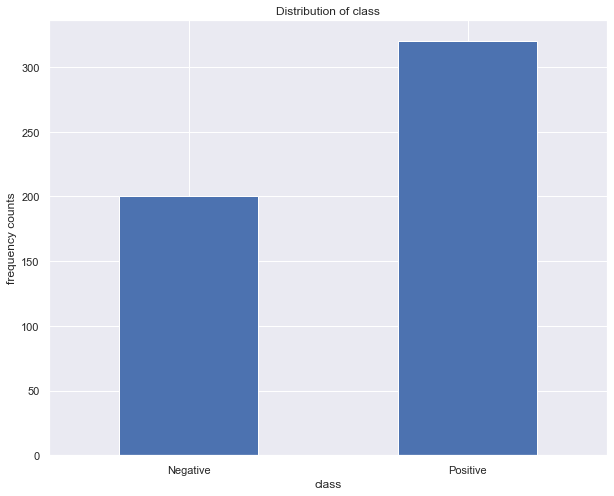

In [40]:
# CLASS
# Visualizing the class
df['class'].value_counts().sort_values().plot.bar()
plt.xlabel('class')
plt.ylabel('frequency counts')
plt.title('Distribution of class')
plt.xticks(rotation=0);

In [41]:
# Gender Distribution of Patients with class
df[df['class']=='Positive'].Gender.value_counts().to_frame()

,Gender
Female,173
Male,147


more female patients tested positive for diabetes than male patients

In [42]:
prop_female_class=(173/192)*100
prop_male_class=(147/328)*100
print('percentage of male with Diabetes :',prop_male_class)
print('percentage of female with Diabetes :',prop_female_class)

percentage of male with Diabetes : 44.81707317073171
percentage of female with Diabetes : 90.10416666666666


Text(0.5, 1.0, 'Age Distribution of Diabetes patients')

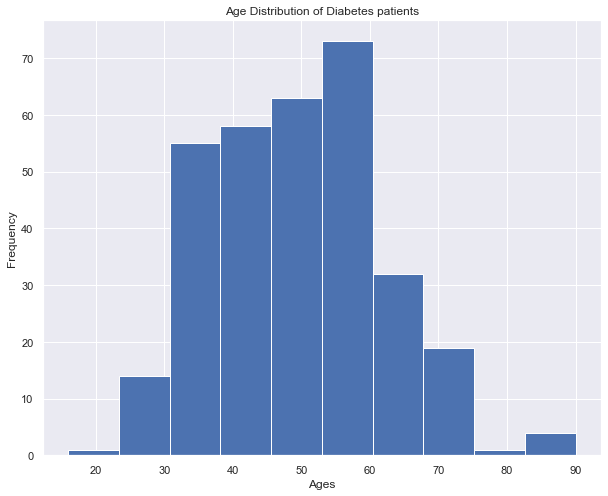

In [43]:
# Age Distribution of patients with class
df[df['class']=='Positive'].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution of Diabetes patients")

Most of the Diabetes patients are older than 30 years and the majority are in their 50s and 60s.
It appears that diabetes does easily affect the old than the young but it's sad that some patients are between 0 and 20 years, which is very early.

In [44]:
cl_pu = df[df['class']=='Positive'].Polyuria.value_counts()
cl_pu

Yes    243
No      77
Name: Polyuria, dtype: int64

Text(0.5, 1.0, 'Diabetes Patients With Polyuria Counts')

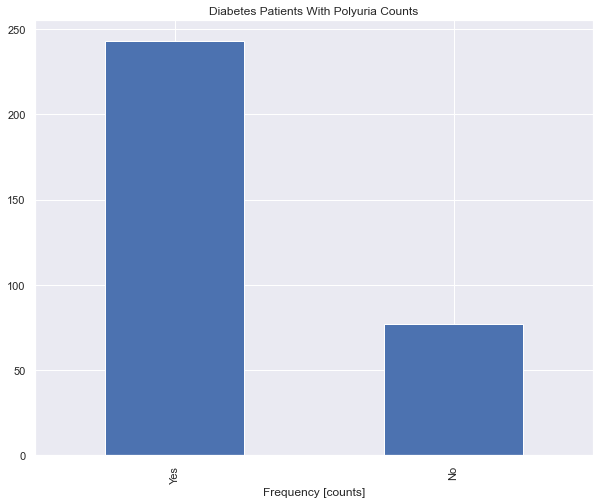

In [45]:
cl_pu.plot(kind="bar")
plt.xlabel("Frequency [counts]")
plt.title("Diabetes Patients With Polyuria Counts")

243 Patients who had Polyuria tested positive for diabetes

In [46]:
df[df['class']=='Positive'].Polydipsia.value_counts()

Yes    225
No      95
Name: Polydipsia, dtype: int64

Text(0.5, 1.0, 'Diabetes Patients With Polydipsia Counts')

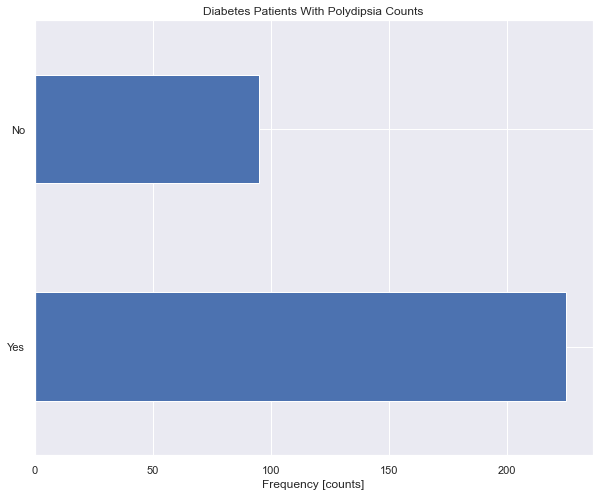

In [47]:
df[df['class']=='Positive'].Polydipsia.value_counts().plot(kind="barh")
plt.xlabel("Frequency [counts]")
plt.title("Diabetes Patients With Polydipsia Counts")

225 Patients who had Polydipsia tested positive for diabetes

In [48]:
df[df['class']=='Positive'].weakness.value_counts()

Yes    218
No     102
Name: weakness, dtype: int64

Text(0.5, 1.0, 'Diabetes Patients With Weakness Counts')

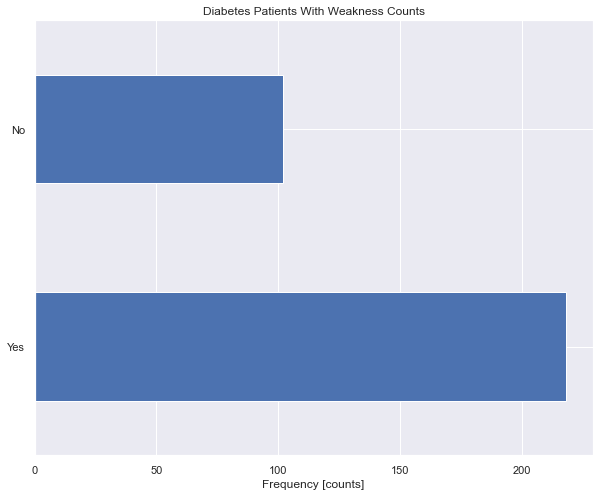

In [49]:
df[df['class']=='Positive'].weakness.value_counts().plot(kind="barh")
plt.xlabel("Frequency [counts]")
plt.title("Diabetes Patients With Weakness Counts")

218  weak patients tested positive for diabetes

In [50]:
df[df['class']=='Positive'].Polyphagia.value_counts()

Yes    189
No     131
Name: Polyphagia, dtype: int64

Text(0.5, 1.0, 'Diabetes Patients With Polyphagia Counts')

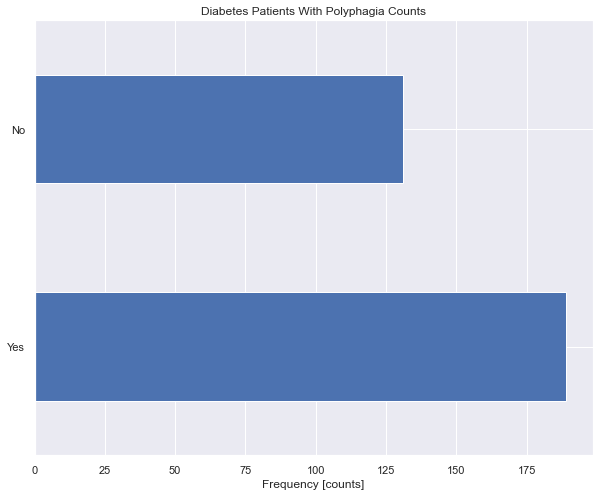

In [51]:
df[df['class']=='Positive'].Polyphagia.value_counts().plot(kind="barh")
plt.xlabel("Frequency [counts]")
plt.title("Diabetes Patients With Polyphagia Counts")

189 of Patients who had Polyphagia tested positive for diabetes

In [52]:
df[df['class']=='Positive'].Alopecia.value_counts()

No     242
Yes     78
Name: Alopecia, dtype: int64

Text(0.5, 1.0, 'Diabetes Patients With Alopecia Counts')

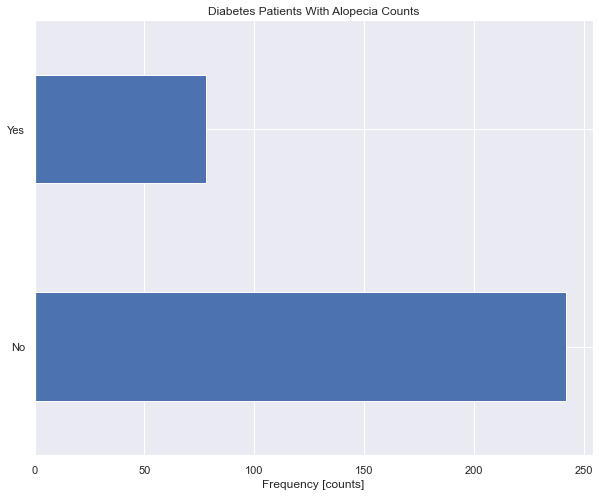

In [53]:
df[df['class']=='Positive'].Alopecia.value_counts().plot(kind="barh")
plt.xlabel("Frequency [counts]")
plt.title("Diabetes Patients With Alopecia Counts")

78 patients who did  suffer from Alopecia tested positive for diabetes

In [54]:
df[df['class']=='Positive'].Obesity.value_counts()

No     259
Yes     61
Name: Obesity, dtype: int64

Text(0.5, 1.0, 'Diabetes Patients With Obesity Counts')

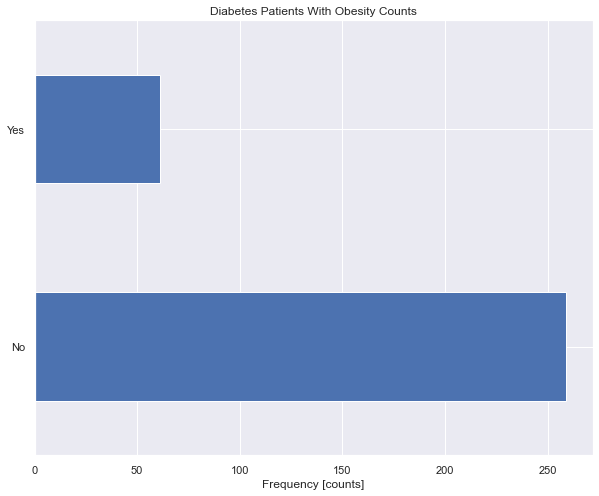

In [55]:
df[df['class']=='Positive'].Obesity.value_counts().plot(kind="barh")
plt.xlabel("Frequency [counts]")
plt.title("Diabetes Patients With Obesity Counts")

61 Patients who are  obess tested positive for diabetes

### Performing some masking to sort out some data 

In [56]:
df[(df['class']=='Positive')  & (df['Age']<20)]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive


##### One teenage male Patient tested Positive for diabetes which is very sad

In [57]:
df[(df['weakness']=='Yes')  & (df['Age']>=60) & (df['Gender']=='Female')]
# Week aged female Patients

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
46,60,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Positive
47,60,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive
52,60,Female,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,Positive
56,66,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
60,65,Female,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,Positive
63,60,Female,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Positive
88,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
105,69,Female,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Positive
118,65,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive


In [58]:
df[(df['Obesity']=='No')  & (df['Age']>=60) & (df['Gender']=='Male')]
# Aged male Patients who are not obess

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive
14,60,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
18,66,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Positive
20,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive
36,60,Male,Yes,No,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
103,72,Male,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Positive
104,70,Male,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Positive
113,79,Male,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive


In [59]:
df[(df['class']=='Positive')  & (df['Age']<40) & (df['Gender']=='Female')&(df['Polyuria']=='Yes')]
# Female Patients less than 40 years, has polyuria and tested Poditive for diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
39,30,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Positive
43,35,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive
48,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Positive
50,36,Female,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Positive
59,39,Female,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Positive
61,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
66,30,Female,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,Positive
73,38,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
78,39,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
80,35,Female,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Positive


In [60]:
df[(df['class']=='Positive')  & (df['Age']<=50) & (df['weakness']=='No') & (df['Polyuria']=='Yes') & (df['Alopecia']=='Yes') & (df['Polydipsia']=='No')]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
12,35,Male,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,Positive
22,39,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
38,35,Male,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Positive
139,40,Male,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Positive
174,35,Male,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Positive
195,31,Male,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive
427,39,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
443,35,Male,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Positive


#####  Patients less than or equal to 50 years, has polyuria and Alopecia ,no weekness and has no Polydipsia and  tested Poditive for diabetes.

### Encoding the Categorical Variables In order to check for the correlation  

In [61]:
# Loop over columns and apply LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# df is now encoded
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [62]:
# Average diabetes Rate
mean = df['class'].mean()
print('The expected Probability of diabetes is:', mean)

The expected Probability of diabetes is: 0.6153846153846154


Since the expected probability of  diabetes is greater than 0.5, It means there are high chances of patient testing positive
for diabetes given the information from the data.

In [63]:
# diabetes rate per gender
df.groupby('Gender').aggregate({'class':'mean'})

,class
Gender,
0,0.901042
1,0.448171


Female Patients has higher rate of getting diabetes than male Patients

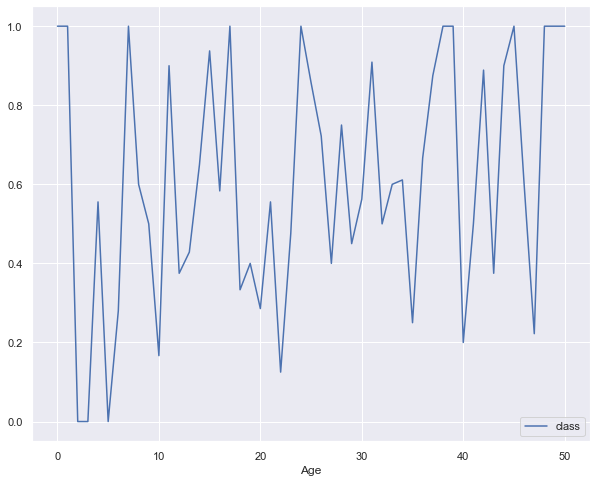

In [64]:
# diabetes rate per Age Distribution
df.groupby('Age').aggregate({'class':'mean'}).plot();

In [65]:
# CORRELATION

correlation = df.corr()
correlation

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.067835,0.209066,0.130718,0.056937,0.233688,0.325301,0.080612,0.405024,0.293839,0.210919,0.265017,0.236820,0.304223,0.326015,0.149931,0.106419
Gender,0.067835,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.209066,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.130718,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.056937,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.233688,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.325301,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.080612,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.405024,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.293839,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


#### I would like to use logistic regression model therefore  I would have to select the independent variables which have a good correlation with the dependent variable (Class) since a logistic Regression Model is a Linear Model.


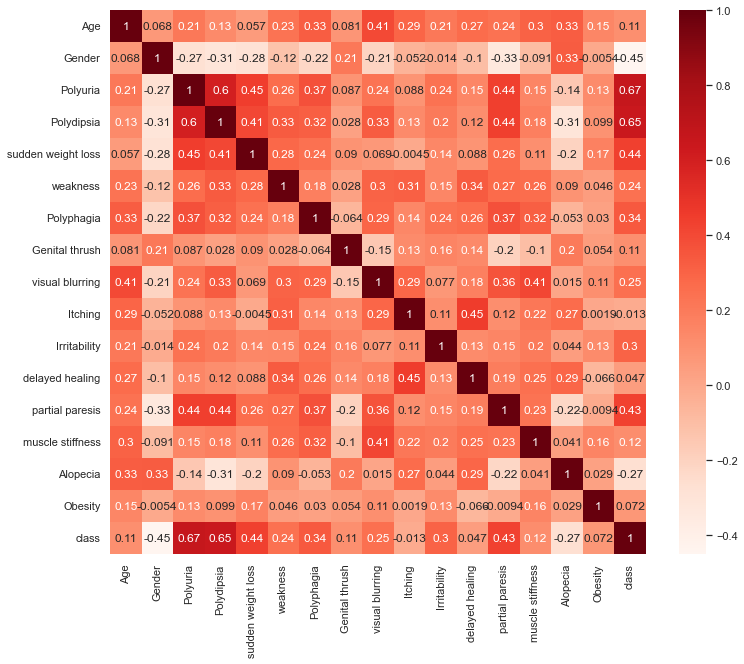

In [66]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(correlation, cmap = 'Reds', annot= True);

 Since the variables Polyuria, Polydipsia, sudden weight loss, weakness, polyphagia, visual blurring, 
irritability,and Partial paresis has a good correlation with the target variable ("class"), I 
will select these variables as my independent variables for my logistic regression model.

At least any correlation > 0.2 should be okay in this case.
Including too many variables especially those that are not strongly related to dependent variable , can
lead to overfitting and reduce generalizability of our model.


In [67]:
# renaming columns
df.rename(columns={'sudden weight loss': 'sudden_weight_loss', 'visual blurring': 'visual_blurring', 'partial paresis': 'partial_paresis'}, inplace=True)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital thrush,visual_blurring,Itching,Irritability,delayed healing,partial_paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


changing my variable names for my independent variables will bring more flexibility in my model deployment stage

In [68]:
cols = ['Age', 'Gender', 'Genital thrush', 'Itching', 'delayed healing', 
                     'muscle stiffness', 'Alopecia', 'Obesity']
df.drop(cols, axis = 1, inplace = True)
df.head()

,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,visual_blurring,Irritability,partial_paresis,class
0,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,1,0,1,1
2,1,0,0,1,1,0,0,0,1
3,0,0,1,1,1,0,0,0,1
4,1,1,1,1,1,1,1,1,1


### Building the model

In [69]:
X = df.drop(columns=['class'])
y = df['class']
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (520, 8) 
y shape: (520,)


In [70]:
# import library
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# create a pipeline for the necessary processes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('f-test', SelectKBest(score_func=f_classif,k = 8)),
])

# fit the pipeline with the data
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer()), ('f-test', SelectKBest(k=8))])

In [71]:
import numpy as np

# Get the F-test scores and p-values
f_test_scores = pipeline.named_steps['f-test'].scores_
p_values = pipeline.named_steps['f-test'].pvalues_

# Create a DataFrame to show the scores and p-values
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'F-test score': f_test_scores,
    'p-value': p_values
})

# Sort the DataFrame by p-value in ascending order
scores_df = scores_df.sort_values(by='p-value', ascending=True)

# Print the DataFrame
scores_df


,Feature,F-test score,p-value
0,Polyuria,412.738410,6.384838e-68
1,Polydipsia,376.422649,1.964187e-63
2,sudden_weight_loss,121.973731,1.307517e-25
7,partial_paresis,119.046534,4.328222e-25
4,Polyphagia,68.841759,9.295946e-16
6,Irritability,51.030999,3.099695e-12
5,visual_blurring,34.917760,6.238605e-09
3,weakness,32.585064,1.922906e-08


asuming our alpha value  $\alpha = 0.01$. we compare our alpha value to our p-values, we can see that our p-values are less than the alpha value.therefore we include all the features in our model

In [72]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (468, 8)
y_train shape: (468,)
X_test shape: (52, 8)
y_test shape: (52,)


In [73]:
y_train.value_counts()

1    289
0    179
Name: class, dtype: int64

In [74]:
y_test.value_counts()

1    31
0    21
Name: class, dtype: int64

In [75]:
# Define a hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs']  # Solver algorithm
}

In [76]:
grid_search = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = param_grid,
    cv = 5, 
    scoring='accuracy',
    verbose =1,
    n_jobs = -1
)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [77]:
# train it on the dataset
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueEr

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [78]:
# get parameters for the model
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [79]:
# build the model using the best parameters
model_lgr = LogisticRegression(max_iter=1000, **best_params)
model_lgr

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [80]:
# train the model
model_lgr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

### MODEL EVALUATION

In [81]:
# Calculating the baseline accuracy
acc_baseline = y_train.value_counts(normalize = True).max()
print('The baseline accuracy is ', round(acc_baseline * 100, 4), '%')

The baseline accuracy is  61.7521 %


In [82]:
# predict the test data
y_pred = model_lgr.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0])

In [83]:
# calculate the training accuracy
training_acc = model_lgr.score(X_train, y_train)
print(f"Training accuracy for training data: {round(training_acc* 100, 4) }%")

Training accuracy for training data: 87.3932%


training accuracy is very good. This means the model has trained well since the accuracy is greater than the baseline
accuracy

In [84]:
# calculate the testing accuracy
test_acc = model_lgr.score(X_test, y_test)
print(f"Test accuracy: {test_acc * 100}%")

Test accuracy: 82.6923076923077%


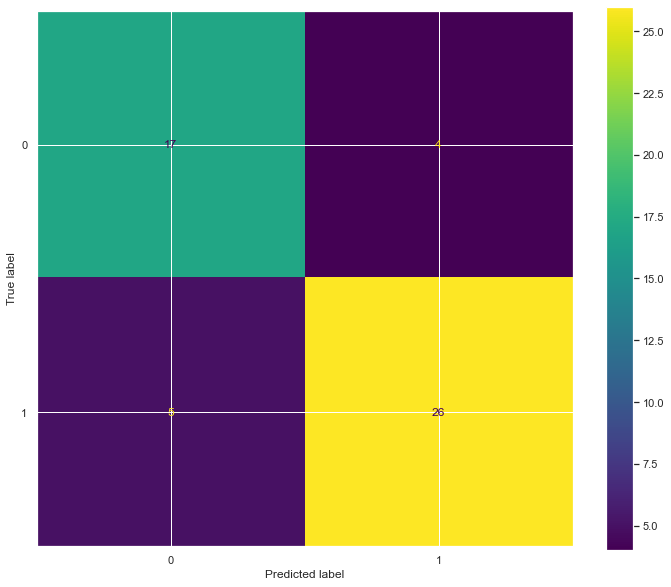

In [85]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(model_lgr, X_test, y_test);

In [86]:
y_pred_proba = model_lgr.predict_proba(X_test)[:, 1]
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_pred)

# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.8525
AUC-ROC Score: 0.8932
Recall: 0.8387
Precision: 0.8667


#### Since our AUC-ROC is high, It indicate better discrimination between the positive and the negative classes

##### Since our Recall is also high, It shows that our model was able to correctly predict more Positive instances 

##### Since our precision is also high, It shows that our model was able to correctly classify more Positive instances

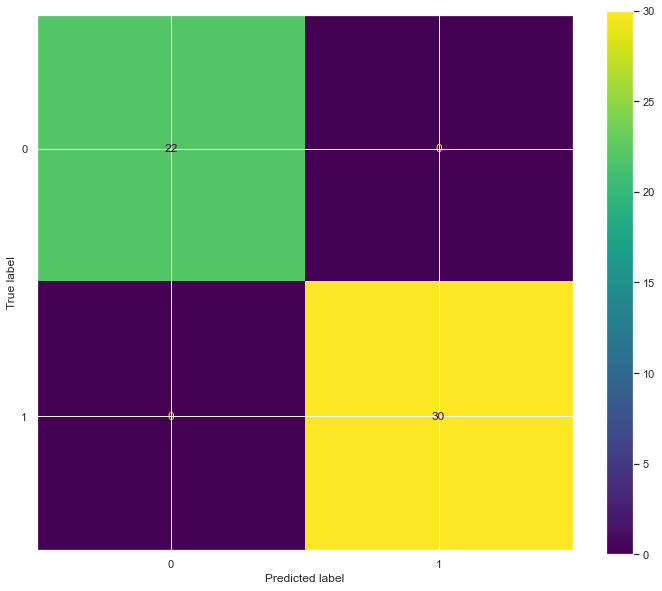

In [87]:
# create a confusion matrix to analyze the model performance on the test data
ConfusionMatrixDisplay.from_estimator(model_lgr, X_test, y_pred);

## COMMUNICATION OF RESULT

In [88]:
features = X.columns
importances = model_lgr.coef_[0]
feat_importances = pd.Series(importances, index = features).sort_values()
feat_importances

weakness              0.000000
Polyphagia            0.000000
visual_blurring       0.000000
Irritability          0.009574
partial_paresis       0.188846
sudden_weight_loss    0.335056
Polyuria              1.749552
Polydipsia            1.827877
dtype: float64

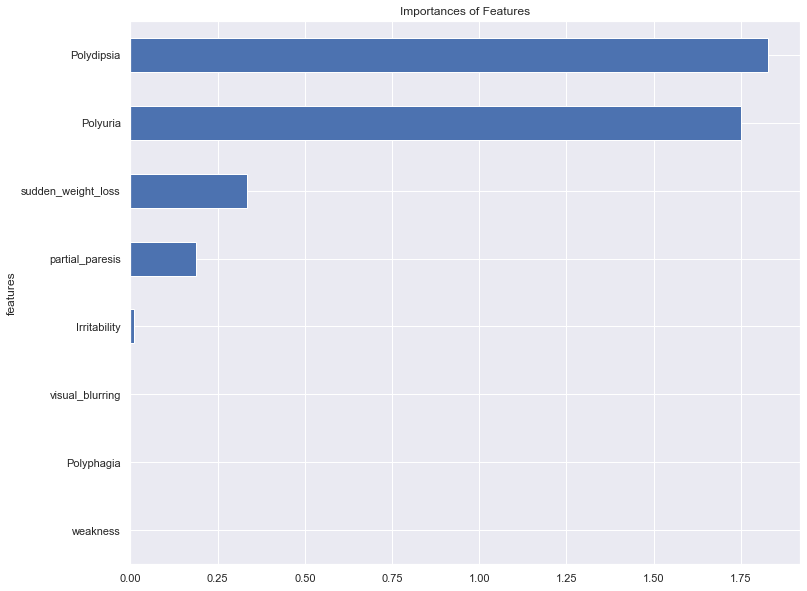

In [89]:
feat_importances = pd.Series(importances, index = features).sort_values()
feat_importances

# Plotting the graph 
feat_importances.plot(
    kind="barh",
    xlabel="features",
    ylabel="Importances",
    title="Importances of Features"
);

#### We can see that Polydipsia has the most influence on the models Prediction.  Meaning that polydipsia is a major factor considering diabetes disease.

#### Also weakness, Polyphagia and  Visual bluming has the least influence in the models prediction

# Model Deloyment

In [90]:
model_lgr.predict_proba(X_test)[:5,-1]

array([0.74012851, 0.94657207, 0.94657207, 0.95392422, 0.33116615])

In [91]:
import gradio as gr

# create a function to predict stroke
def predicta(Polyuria, Polydipsia, sudden_weight_loss, weakness, Polyphagia, visual_blurring, Irritability, partial_paresis):
    
    # create a dataframe with the inputs
    df = pd.DataFrame({
        'Polyuria': [Polyuria], 
        'Polydipsia':[Polydipsia],
        'sudden_weight_loss': [sudden_weight_loss],
        'weakness': [weakness],
        'Polyphagia': [Polyphagia], 
        'visual_blurring': [visual_blurring],
        'Irritability': [Irritability],
        'partial_paresis': [partial_paresis]
    })
    
    # make prediction
    y_pred = model_lgr.predict_proba(df)[:,1] 
    
    rounded_y_pred=np.round(y_pred,decimals=2)
    
    
    # return the stroke probability
    return rounded_y_pred[0]

    

# give the function an interface
app = gr.Interface(
    title= "Diabetes Prediction App",
    fn=predicta,
    inputs=["number","number", "number", "number", "number", "number", "number", "number"],
    outputs=["number"]
)
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://440ebe258d83354368.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
